In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib 
matplotlib.rcParams['figure.figsize'] = [2., 2.]
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['font.size'] = 10.
matplotlib.rcParams['text.usetex'] = True
import numpy as np
from IPython.display import Markdown as md

# Introduction to Optimization
This is meant to be an extremely brief introduction to optimization. I'm not covering the depths of how an optimizer works (nor am I qualified to), but my hope is that this provides an accessible way to learn how to read the statement of an optimization problem and how to implement the optimization in software.

In a typical Calculus 1 class, you might be given a problem that reads something like

> Find the minimum of $f(x) = x^2$

Now, this problem could actually be solved quite easily by looking at a graph and noticing that the minimum is at $x=0$.

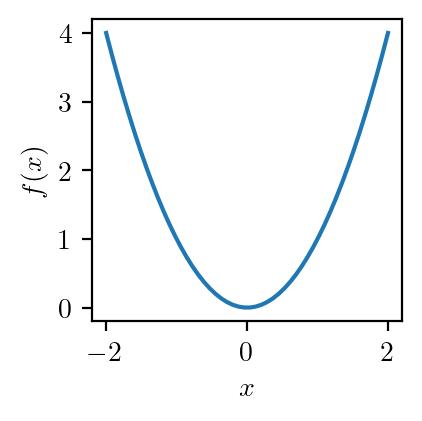

In [5]:
x = np.linspace(-2,2)
plt.plot(x, x**2)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
pass

But also notice that at $x=0$, the slope of the graph is 0. This is a feature that will be true at any minimum (or maximum). It is for this reason that your calculus teacher gave you a problem like this in the first place! You can find the minimum of a function by finding points where the slope of the function is zero! Now, if you remember right, there's one more step to this - you have to check if the zero slope point is in a region that is concave up. This is known as the second derivative test. If the second derivative is positive, the region is concave up and you've found a minimum!

It is this action - finding where a function has zero slope - that many optimization algorithms perform.

### Writing an optimization problem mathematically
Our example problem from above can be written mathematically as
$$
\min_x x^2.
$$
Putting the $x$ under $\min$ means that we can change the $x$ to find the value that makes $x^2$ the smallest. We read a problem like this as "minimize $x^2$, with respect to $x$". You may sometimes see with respect to abbreviated as "w.r.t."

### Adding constraints
In a real-world problem, you're going to have constraints that you need to make sure are met. For our example problem, lets say that we want to make sure $x \geq 1$. We'd add that to our written problem using "s.t.", which stands for the verb "subject to", meaning "find the solution, subject to the constraints". Our example problem is then
\begin{align}
\min_x &&&x^2\\
\text{s.t.} &&& x \geq 1.
\end{align}
In the picture below, this means to find the minimum $x$ outside the shaded region.

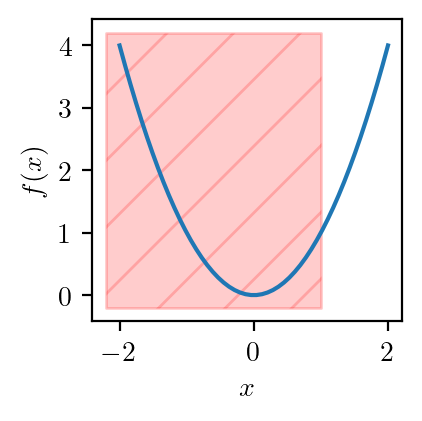

In [20]:
x = np.linspace(-2,2)
plt.plot(x, x**2)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.fill_betweenx(plt.ylim(), plt.xlim()[0], 1, alpha=.2, color="r", hatch="/")
pass

## Solving An Optimization with a computer
Now, as our problems get harder to solve, we'll want to solve the problems using a computer instead of by hand. People get Ph.D.s developing optimization algorithms, so instead of writing our own optimizer, we will take advantage of their hard work, and use one that someone else wrote and that is free for python programmers to use. It is the `scipy.optimize.minimize` optimizer. [The documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) provides a good description of all of the options that it provides. Below, we demonstrate how to write our example optimization for this optimizer.

There are many ways to set up an optimization in code, but I have found the following method of encapsulating everything in a function to work well as the problems get more complex.

In [11]:
from scipy.optimize import minimize

def solve_example(xmin=1):
    
    def obj(x):
        # this is the objective function, it should return a single number
        return x**2
    
    def ineq_con(x):
        # this is the inequality constraint function, it can return a vector of numbers
        # for our example, it just returns a single number.
        # Notice how I am using the xmin variable from the solve_example scope here in the ineq_con function
        return x - xmin 
    
    # to make things more interesting, we're going to add bounds on x
    # these won't affect the answer, but demonstrate how to add bounds
    bounds = [(-10, 10)]
    
    # This is the initial guess, notice that it's violating the constraint.
    x0 = np.array([-5.0]) 
    
    constraints = [{"type": "ineq", "fun": ineq_con}]
    
    res = minimize(obj, x0, bounds=bounds, constraints=constraints)
    
    # res is an object with a bunch of members
    # the two most important are x, which is the result, and success, which indicates if the optimization succeeded
    if res.success:
        print(f"Optimization succeeded! x* = {res.x}")
    else:
        print("Optimization failed")
    
solve_example()
print("\t>>> Active constraint\n")

solve_example(-1.0)
print("\t>>> Inactive constraint\n")

solve_example(15.0)
print("\t>>> Bounds violation")

Optimization succeeded! x* = [1.]
	>>> Active constraint

Optimization succeeded! x* = [0.]
	>>> Inactive constraint

Optimization failed
	>>> Bounds violation
